# ## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')


data = pd.read_csv('Emotion_final.csv')
data

[nltk_data] Downloading package stopwords to /Users/slyx/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


# ## ANALYSING THE DATASET

In [2]:
data.describe()

,Text,Emotion
count,21459,21459
unique,21405,6
top,i feel more adventurous willing to take risks ...,happy
freq,2,7029


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


In [4]:
n_data = data.groupby(['Emotion']).count()
n_data

,Text
Emotion,
anger,2993
fear,2652
happy,7029
love,1641
sadness,6265
surprise,879


In [5]:
lenght_data = data['Text'].apply(len)
lenght_data

0         23
1        108
2         48
3         92
4         20
        ... 
21454     36
21455     91
21456     36
21457     50
21458     31
Name: Text, Length: 21459, dtype: int64

/Users/slyx/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Emotion', ylabel='count'>

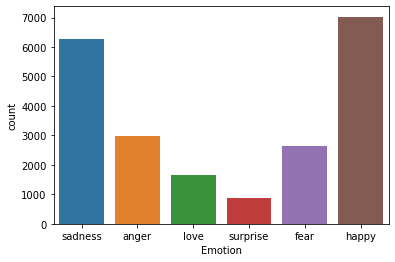

In [6]:
sns.countplot(data['Emotion'], label = "Count") 

<AxesSubplot:ylabel='Frequency'>

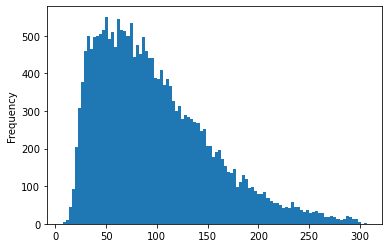

In [7]:
lenght_data.plot(bins=100, kind='hist') 

# ##REMOVING PUNCTUATION AND STOPWORDS

In [8]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [9]:
data_clean = data['Text'].apply(message_cleaning)

In [49]:
data_clean

0                                [didnt, feel, humiliated]
1        [go, feeling, hopeless, damned, hopeful, aroun...
2        [im, grabbing, minute, post, feel, greedy, wrong]
3        [ever, feeling, nostalgic, fireplace, know, st...
4                                       [feeling, grouchy]
                               ...                        
21454                      [Melissa, stared, friend, dism]
21455    [Successive, state, elections, seen, governing...
21456                         [Vincent, irritated, dismay]
21457    [KendallHume, turned, back, face, dismayed, coup]
21458                                  [dismayed, surpris]
Name: Text, Length: 21459, dtype: object

# ##APPLYING COUNT VECTORIZER

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

# Define the cleaning pipeline
vectorizer = CountVectorizer(analyzer = message_cleaning)
data_countvectorizer = vectorizer.fit_transform(data['Text'])

In [54]:
data_countvectorizer

<21459x19763 sparse matrix of type '<class 'numpy.int64'>'
	with 193811 stored elements in Compressed Sparse Row format>

In [55]:
print(vectorizer.get_feature_names())


['10', '11', '1295', '13', '15', '15yearold', '1878', '18years', '19', '191523', '1917', '1926', '1929', '1974', '1975', '1978', '1980', '1980s', '1984', '1986', '1987', '1989', '1991', '1992', '199394', '19th', '2', '200000', '20th', '21', '23monthold', '23r', '24', '30', '32', '33', '34', '35', '37574', '4', '40000', '403', '40th', '46', '48', '5', '50', '500', '55', '70', '75th', '82ndminute', '9th', 'AFRICA', 'ALD', 'ASLEF', 'Aaron', 'Abd', 'Abigail', 'According', 'Accordingly', 'Accountants', 'Adam', 'Admiral', 'Africans', 'Afterwards', 'Aggie', 'Agnes', 'Ah', 'Ahmed', 'Alain', 'Albert', 'Aldridge', 'Alex', 'Alexandra', 'Alexei', 'Alfed', 'Alic', 'Alice', 'Allan', 'Allen', 'Almost', 'Also', 'Although', 'Always', 'America', 'American', 'Amid', 'Ana', 'Andrew', 'Andrus', 'Angalo', 'Ann', 'Anna', 'Annabel', 'Anne', 'Annie', 'Another', 'Anthony', 'Anxious', 'Anyone', 'Aplin', 'Apparently', 'Applause', 'April', 'Araminta', 'Archbishop', 'Aristophanes', 'Arm', 'Armenian', 'Army', 'Arnol

In [56]:
print(data_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [57]:
data_countvectorizer.shape

(21459, 19763)

In [58]:
X = data_countvectorizer
y = data['Emotion'].values

In [59]:
X.shape

(21459, 19763)

In [60]:
y.shape

(21459,)

# ## PREPARING THE DATASET 

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# ## EVALUATING THE MODEL

In [63]:
from sklearn.metrics import classification_report, confusion_matrix


<AxesSubplot:>

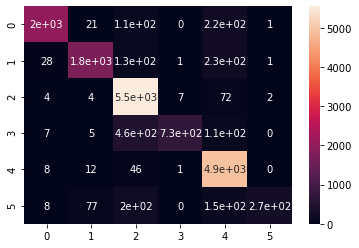

In [64]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

<AxesSubplot:>

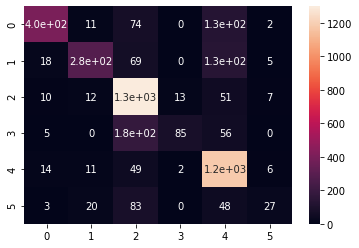

In [65]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [66]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

       anger       0.89      0.65      0.75       619
        fear       0.84      0.56      0.67       509
       happy       0.74      0.93      0.83      1391
        love       0.85      0.26      0.40       326
     sadness       0.74      0.94      0.83      1266
    surprise       0.57      0.15      0.24       181

    accuracy                           0.77      4292
   macro avg       0.77      0.58      0.62      4292
weighted avg       0.78      0.77      0.74      4292



In [67]:
from sklearn.feature_extraction.text import TfidfTransformer

data_tfidf = TfidfTransformer().fit_transform(data_countvectorizer)
print(data_tfidf.shape)

(21459, 19763)


In [68]:
data_tfidf

<21459x19763 sparse matrix of type '<class 'numpy.float64'>'
	with 193811 stored elements in Compressed Sparse Row format>

In [70]:
print(data_tfidf[:,:])


  (0, 9135)	0.7808961457925083
  (0, 7286)	0.17072383162345786
  (0, 5699)	0.6008781763404382
  (1, 16383)	0.26860678686991857
  (1, 9015)	0.34045502311334425
  (1, 9012)	0.34180640619248037
  (1, 8193)	0.24490614716522285
  (1, 7290)	0.11440817225316458
  (1, 5181)	0.46358597017379977
  (1, 3651)	0.42113636164189766
  (1, 2402)	0.40478389206060494
  (1, 2127)	0.25675497086089333
  (2, 19589)	0.39190733671237105
  (2, 13639)	0.3660323108408915
  (2, 11573)	0.45841106680558996
  (2, 9285)	0.18577210074269013
  (2, 8347)	0.4013509452912081
  (2, 8272)	0.5465058663301114
  (2, 7286)	0.08958662873403526
  (3, 16809)	0.25522179756768404
  (3, 13984)	0.5372639170580724
  (3, 12305)	0.39875985829327504
  (3, 10330)	0.23579326310578713
  (3, 7440)	0.560988306787964
  (3, 7290)	0.13036517787514296
  :	:
  (21453, 261)	0.5611256886807784
  (21454, 16713)	0.47444663275230925
  (21454, 7813)	0.356806855398136
  (21454, 5872)	0.5188394781384743
  (21454, 793)	0.6151380792439083
  (21455, 16735)	0.2

In [ ]:
X = data_tfidf
y = data['Text'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

KeyboardInterrupt: 